### 0 - Normal Transaction
### 1 - Fraudalant Transaction

In [1]:
# Important Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression


In [2]:
# Data Loading and Reading
credit_card_data=pd.read_csv(r"C:\Users\talib\Downloads\creditcard.csv")

In [3]:
# Data shape
credit_card_data.shape

(284807, 31)

In [4]:
# first 5 records
credit_card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
# info of the data -MetaData
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
# Statistical Description of the data
credit_card_data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


C:\Users\talib\AppData\Local\Temp\ipykernel_11860\1862216448.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x='Class',data=credit_card_data,kind="count",palette="cividis")


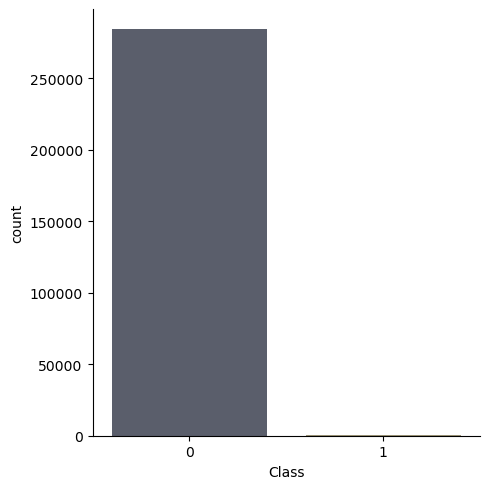

In [8]:
# Data Visualization
sns.catplot(x='Class',data=credit_card_data,kind="count",palette="cividis")

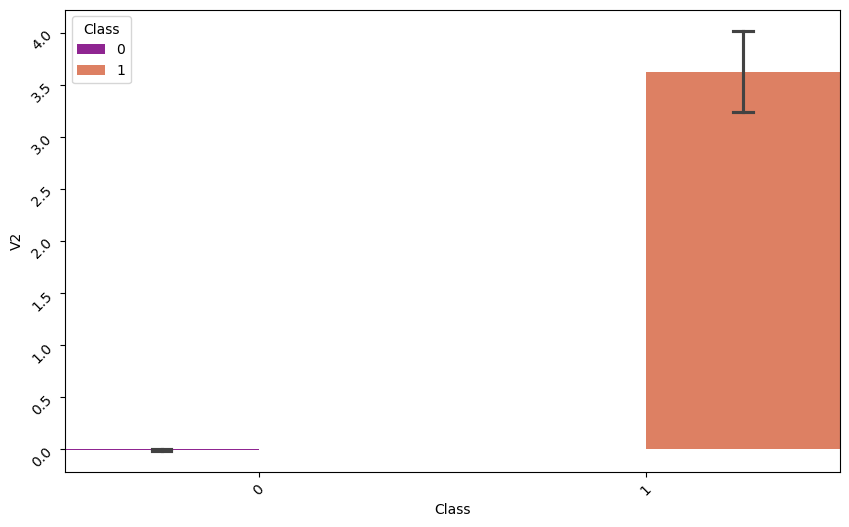

In [10]:
plt.figure(figsize=(10,6))
sns.barplot(x=credit_card_data['Class'],y=credit_card_data['V2'],data=credit_card_data,hue=credit_card_data['Class'],palette="plasma",estimator="mean",dodge=True,saturation=0.8,width=1,capsize=0.1)

plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

In [11]:
# Checking null values
credit_card_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [12]:
credit_card_data['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [14]:
# Seprating the data
legit=credit_card_data[credit_card_data['Class']==0]
fraud=credit_card_data[credit_card_data['Class']==1]

print(legit.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


In [15]:
# Statistical measures
legit['Amount'].describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [16]:
fraud['Amount'].describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [17]:
# Value Comaprison
credit_card_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [18]:
# Performing the UnderSampling
legit_data=legit.sample(n=492)

# conactenating two dataset
new_dataset=pd.concat([legit_data,fraud],axis=0)

In [19]:
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
55712,47084.0,1.396134,-0.913388,-0.973677,-1.615071,1.310818,3.513564,-1.193063,0.864070,-0.513734,...,-0.127516,-0.491278,-0.024464,1.016859,0.592342,-0.319932,0.019115,0.014656,32.25,0
32591,36869.0,1.105425,-0.756117,1.268047,0.336930,-1.401622,0.289087,-1.106112,0.183865,-0.705576,...,-0.023697,0.293367,-0.117856,0.005290,0.269604,-0.260995,0.088840,0.050001,85.80,0
39003,39649.0,-0.009754,-2.887079,-0.971814,-0.012160,-1.277413,-0.075383,0.594010,-0.264709,-0.716866,...,-0.023590,-1.121180,-0.668261,-0.366609,0.129152,1.078129,-0.196358,0.114296,734.92,0
65843,51770.0,1.261238,0.314645,0.529883,0.611426,-0.399191,-0.969492,0.122186,-0.255881,-0.089318,...,-0.247496,-0.672364,0.125282,0.399080,0.248110,0.091882,-0.023249,0.020885,1.79,0
1709,1322.0,0.901869,-1.913098,0.097668,-0.957616,-1.737506,-0.764857,-0.383617,-0.374987,-1.883014,...,-0.146354,-0.593527,-0.239934,0.423107,0.351209,-0.290130,-0.020397,0.075861,329.00,0


In [20]:
# shape
new_dataset.shape

(984, 31)

In [21]:
# value counts
new_dataset['Class'].value_counts()

Class
0    492
1    492
Name: count, dtype: int64

In [22]:
# Mean
new_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94564.626016,-0.009227,0.063901,-0.041619,0.007172,-0.091986,-0.036522,0.037538,0.031205,0.042643,...,-0.023629,-0.008283,0.029491,0.026880,0.001445,-0.004635,0.041820,0.014961,-0.016148,89.460549
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [23]:
# Splitting the data
X=new_dataset.drop(columns='Class',axis=1)
y=new_dataset['Class']

In [24]:
print(X.shape)
print(y.shape)

(984, 30)
(984,)


In [25]:
# Training and splitting of tha data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,stratify=y,random_state=42)
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(787, 30) (787,) (197, 30) (197,)


In [27]:
# Model Training and Prediction
lr=LogisticRegression()

# Training
lr.fit(X_train,y_train)


C:\Users\talib\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [31]:
# Prediction on training data
y_train_pred=lr.predict(X_train)
print(f'Accuracy on Training Data:{accuracy_score(y_train,y_train_pred):.4f}')
print(confusion_matrix(y_train,y_train_pred))
print(classification_report(y_train,y_train_pred))

Accuracy on Training Data:0.9416
[[383  10]
 [ 36 358]]
              precision    recall  f1-score   support

           0       0.91      0.97      0.94       393
           1       0.97      0.91      0.94       394

    accuracy                           0.94       787
   macro avg       0.94      0.94      0.94       787
weighted avg       0.94      0.94      0.94       787



In [32]:
# Prediction on training data
y_test_pred=lr.predict(X_test)
print(f'Accuracy on Testing Data:{accuracy_score(y_test,y_test_pred):.4f}')
print(confusion_matrix(y_test,y_test_pred))
print(classification_report(y_test,y_test_pred))

Accuracy on Testing Data:0.9645
[[97  2]
 [ 5 93]]
              precision    recall  f1-score   support

           0       0.95      0.98      0.97        99
           1       0.98      0.95      0.96        98

    accuracy                           0.96       197
   macro avg       0.96      0.96      0.96       197
weighted avg       0.96      0.96      0.96       197



In [35]:
# Detection system
input_data=(0,-1.3598071336738,-0.0727811733098497,2.53634673796914,1.37815522427443,-0.338320769942518,0.462387777762292,0.239598554061257,0.0986979012610507,0.363786969611213,0.0907941719789316,-0.551599533260813,-0.617800855762348,-0.991389847235408,-0.311169353699879,1.46817697209427,-0.470400525259478,0.207971241929242,0.0257905801985591,0.403992960255733,0.251412098239705,-0.018306777944153,0.277837575558899,-0.110473910188767,0.0669280749146731,0.128539358273528,-0.189114843888824,0.133558376740387,-0.0210530534538215,149.62
)

# changing it into the NumPy Array
numpy_arr_data=np.asarray(input_data)

# resampling of the data
numpy_arr_data=numpy_arr_data.reshape(1,-1)

# Prediction on the unseen data
prediction=lr.predict(numpy_arr_data)

print(prediction)

if prediction[0]==0:
    print("Legit Transaction or Normal Transaction")
else:
    print("Fruadulent Transaction")

[0]
Legit Transaction or Normal Transaction


C:\Users\talib\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
